In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import scipy
from pathlib import Path

import matplotlib.pyplot as plt
from sklearn.cluster import k_means, KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
import sys

sys.path.append("../src")

In [3]:
from core import SITE_NAMES
from calls import plot_call_features, compute_features

In [4]:
site_key = 'Central'
location_call_signals = np.load(f'../data/detected_calls/{site_key}/2022_{site_key}_call_signals.npy', allow_pickle=True)

location_calls_sampled = pd.read_csv(f'../data/detected_calls/{site_key}/2022_{site_key}.csv', index_col=0, low_memory=False)
location_calls_sampled['index'] = location_calls_sampled.index

fft_signals = compute_features.generate_ffts_for_calls(location_calls_sampled, location_call_signals)
welch_signals = compute_features.generate_welchs_for_calls(location_calls_sampled, location_call_signals)

In [5]:
location_calls_sampled

index  bout_index   SD_card            file_name          site  \
0          0           0  UBNA_008  20220726_043000.WAV  Central Pond   
1          1           1  UBNA_008  20220726_043000.WAV  Central Pond   
2          2           2  UBNA_008  20220726_043000.WAV  Central Pond   
3          3           2  UBNA_008  20220726_043000.WAV  Central Pond   
4          4           2  UBNA_008  20220726_043000.WAV  Central Pond   
...      ...         ...       ...                  ...           ...   
45573  45573           1         9  20221017_080000.WAV  Central Pond   
45574  45574           1         9  20221017_080000.WAV  Central Pond   
45575  45575           0         9  20221017_090000.WAV  Central Pond   
45576  45576           0         9  20221017_090000.WAV  Central Pond   
45577  45577           0         9  20221017_100000.WAV  Central Pond   

             SNR  sampling_rate  
0       8.816007         250000  
1       8.216337         250000  
2      32.840316         250000  
3      34.287582         250000  
4      34.798166         250000  
...          ...            ...  
45573  12.742338         192000  
45574  13.566062         192000  
45575  32.780285         192000  
45576  33.829742         192000  
45577  23.626266         192000  

[45578 rows x 7 columns]

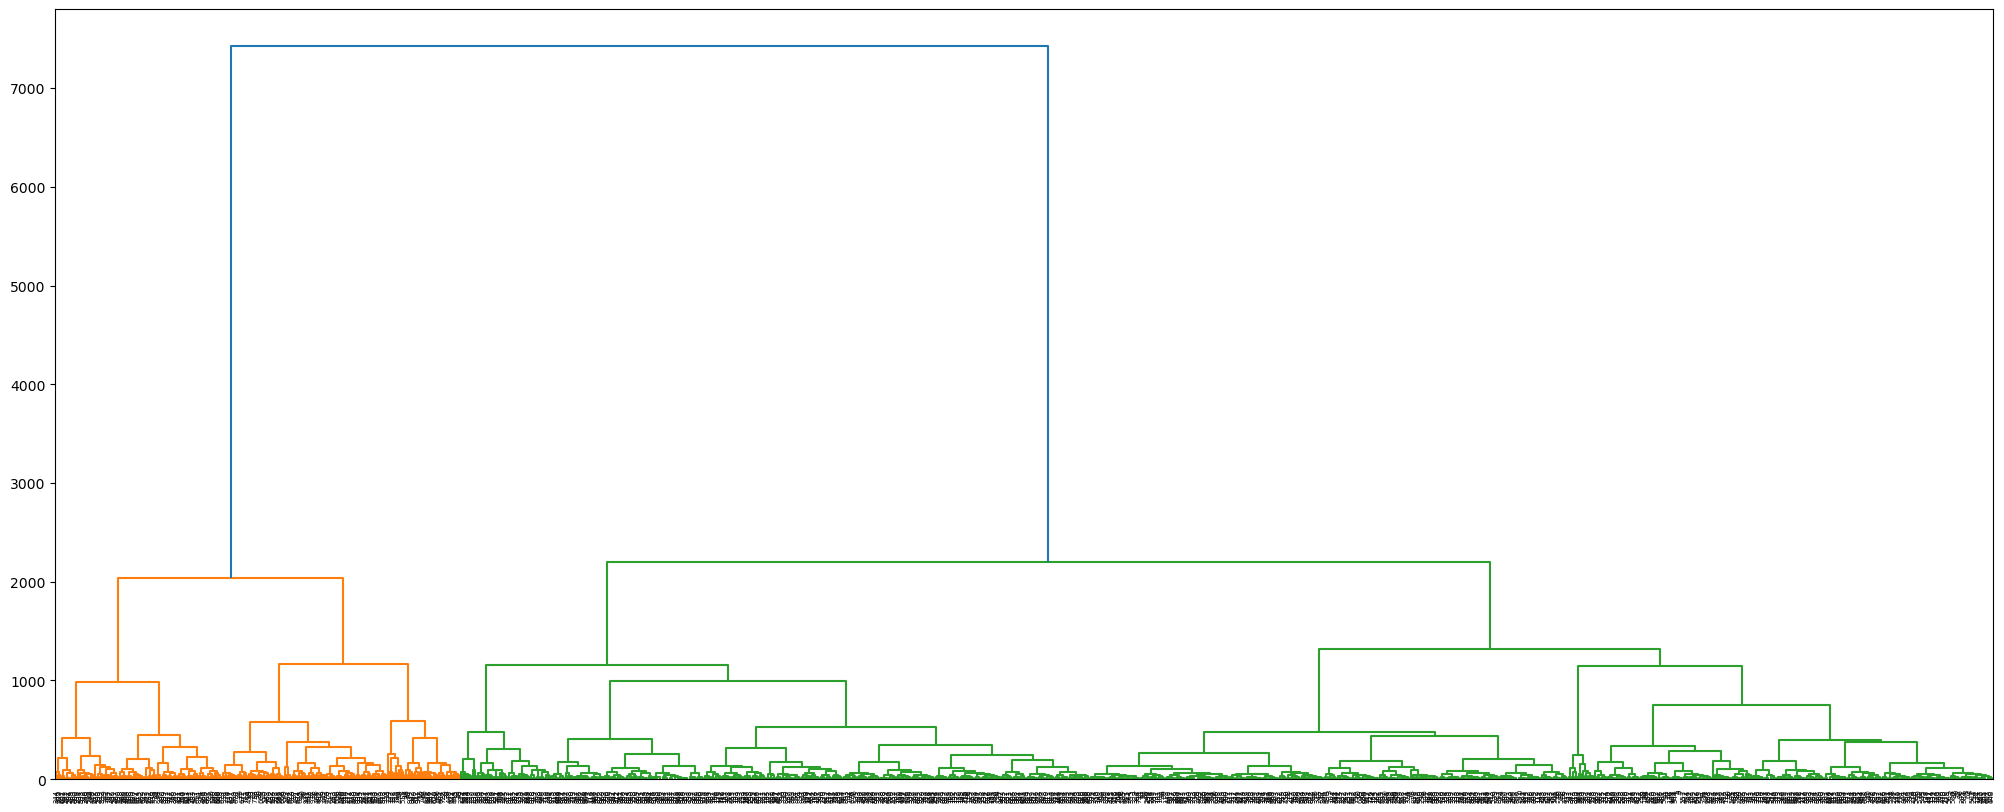

In [6]:
test_subset = welch_signals[:1000]
Z = linkage(test_subset, 'ward')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

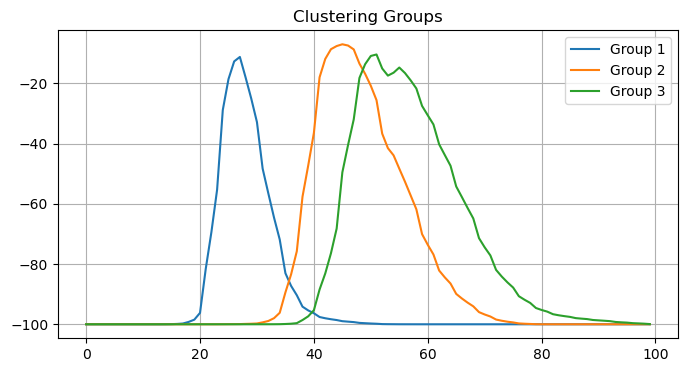

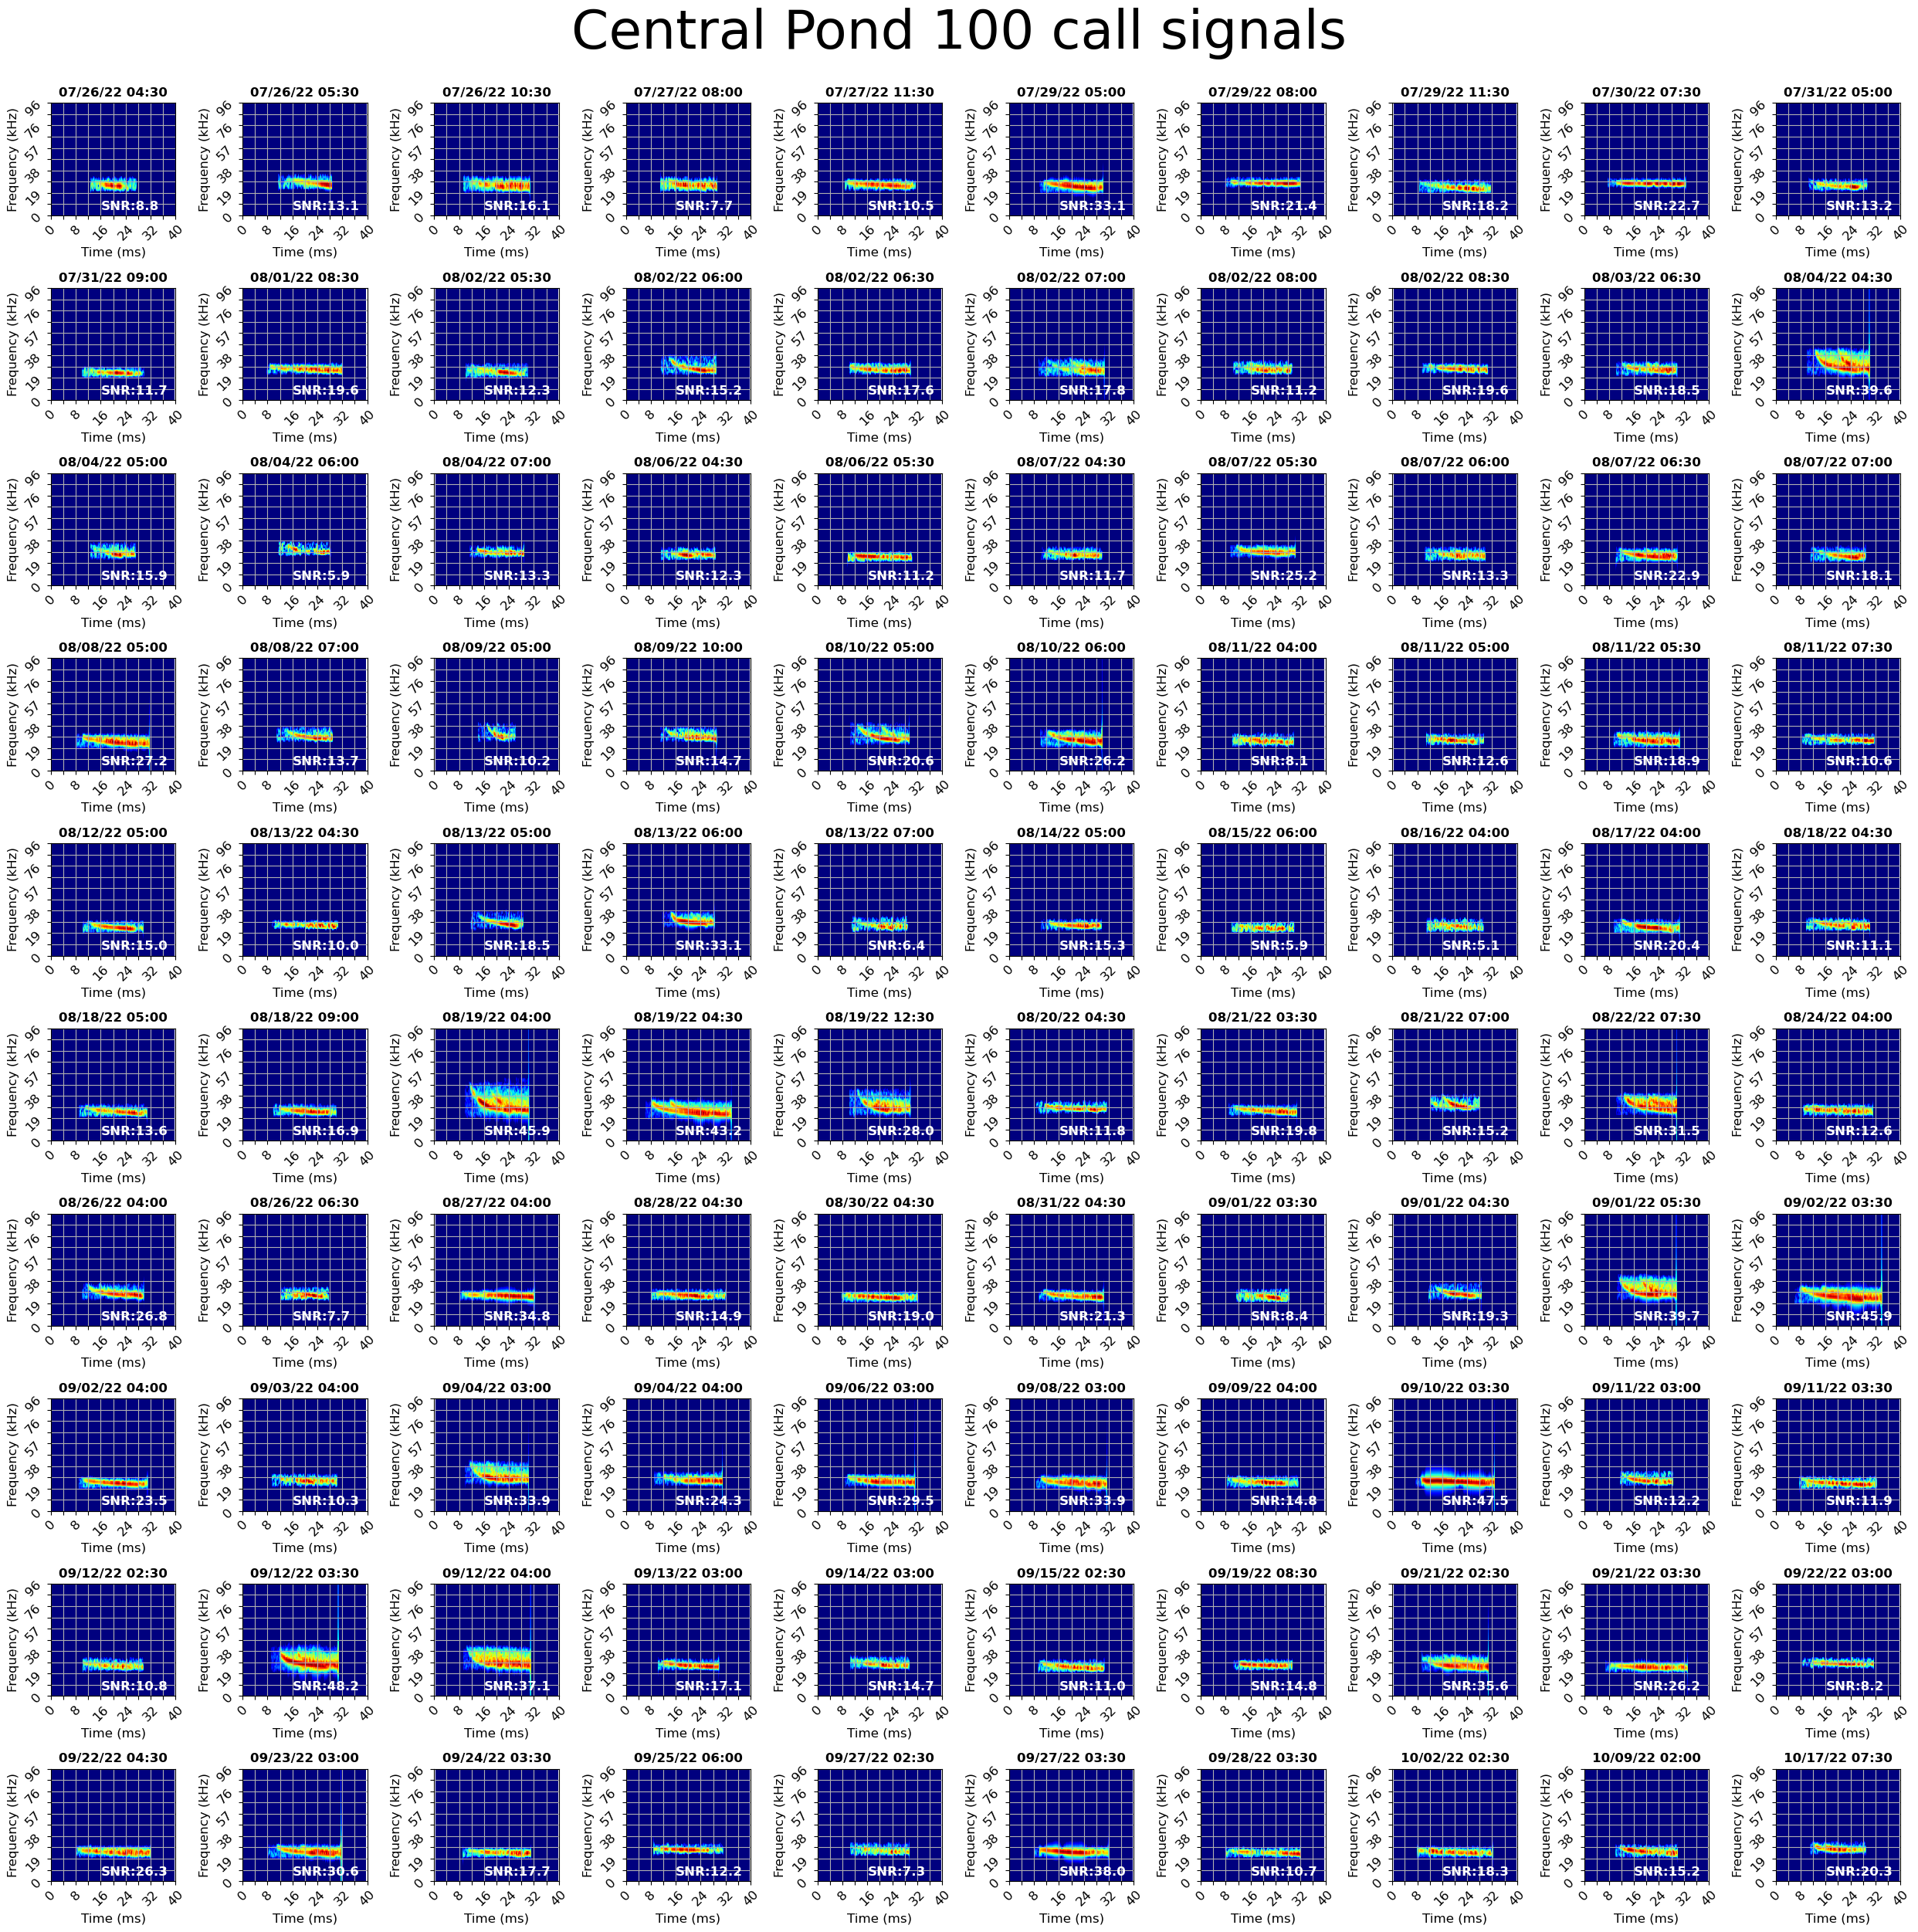

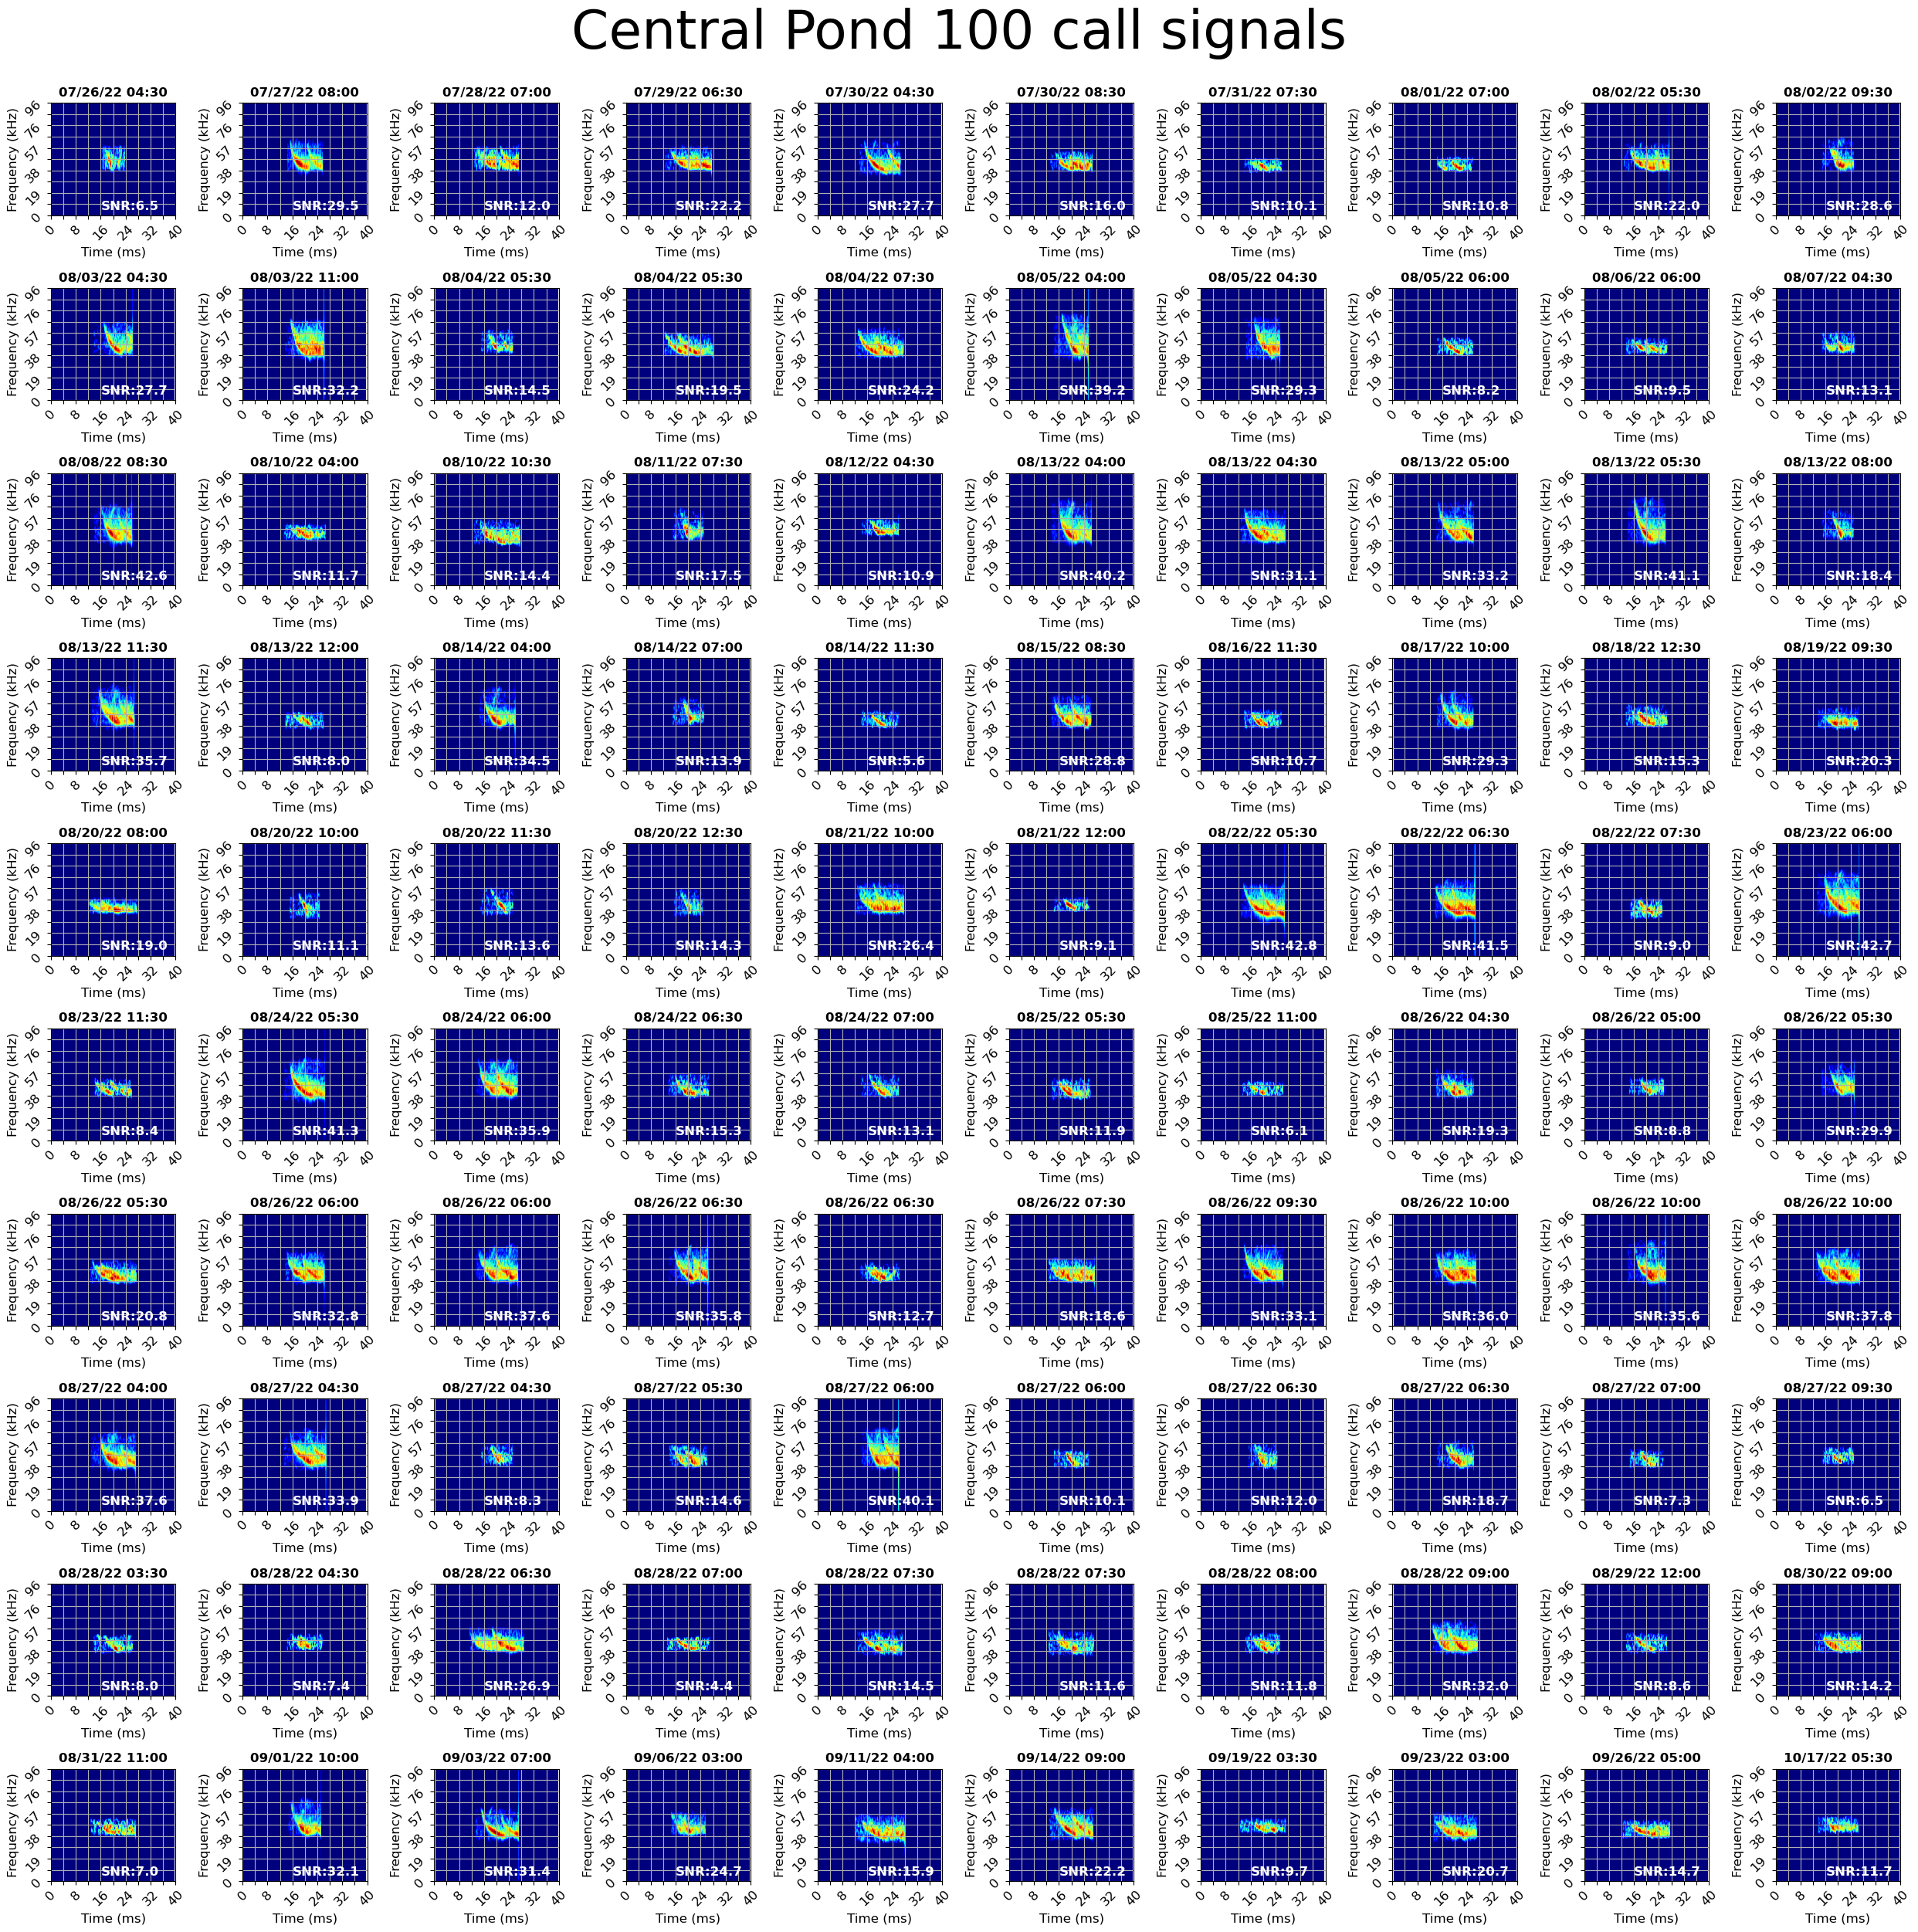

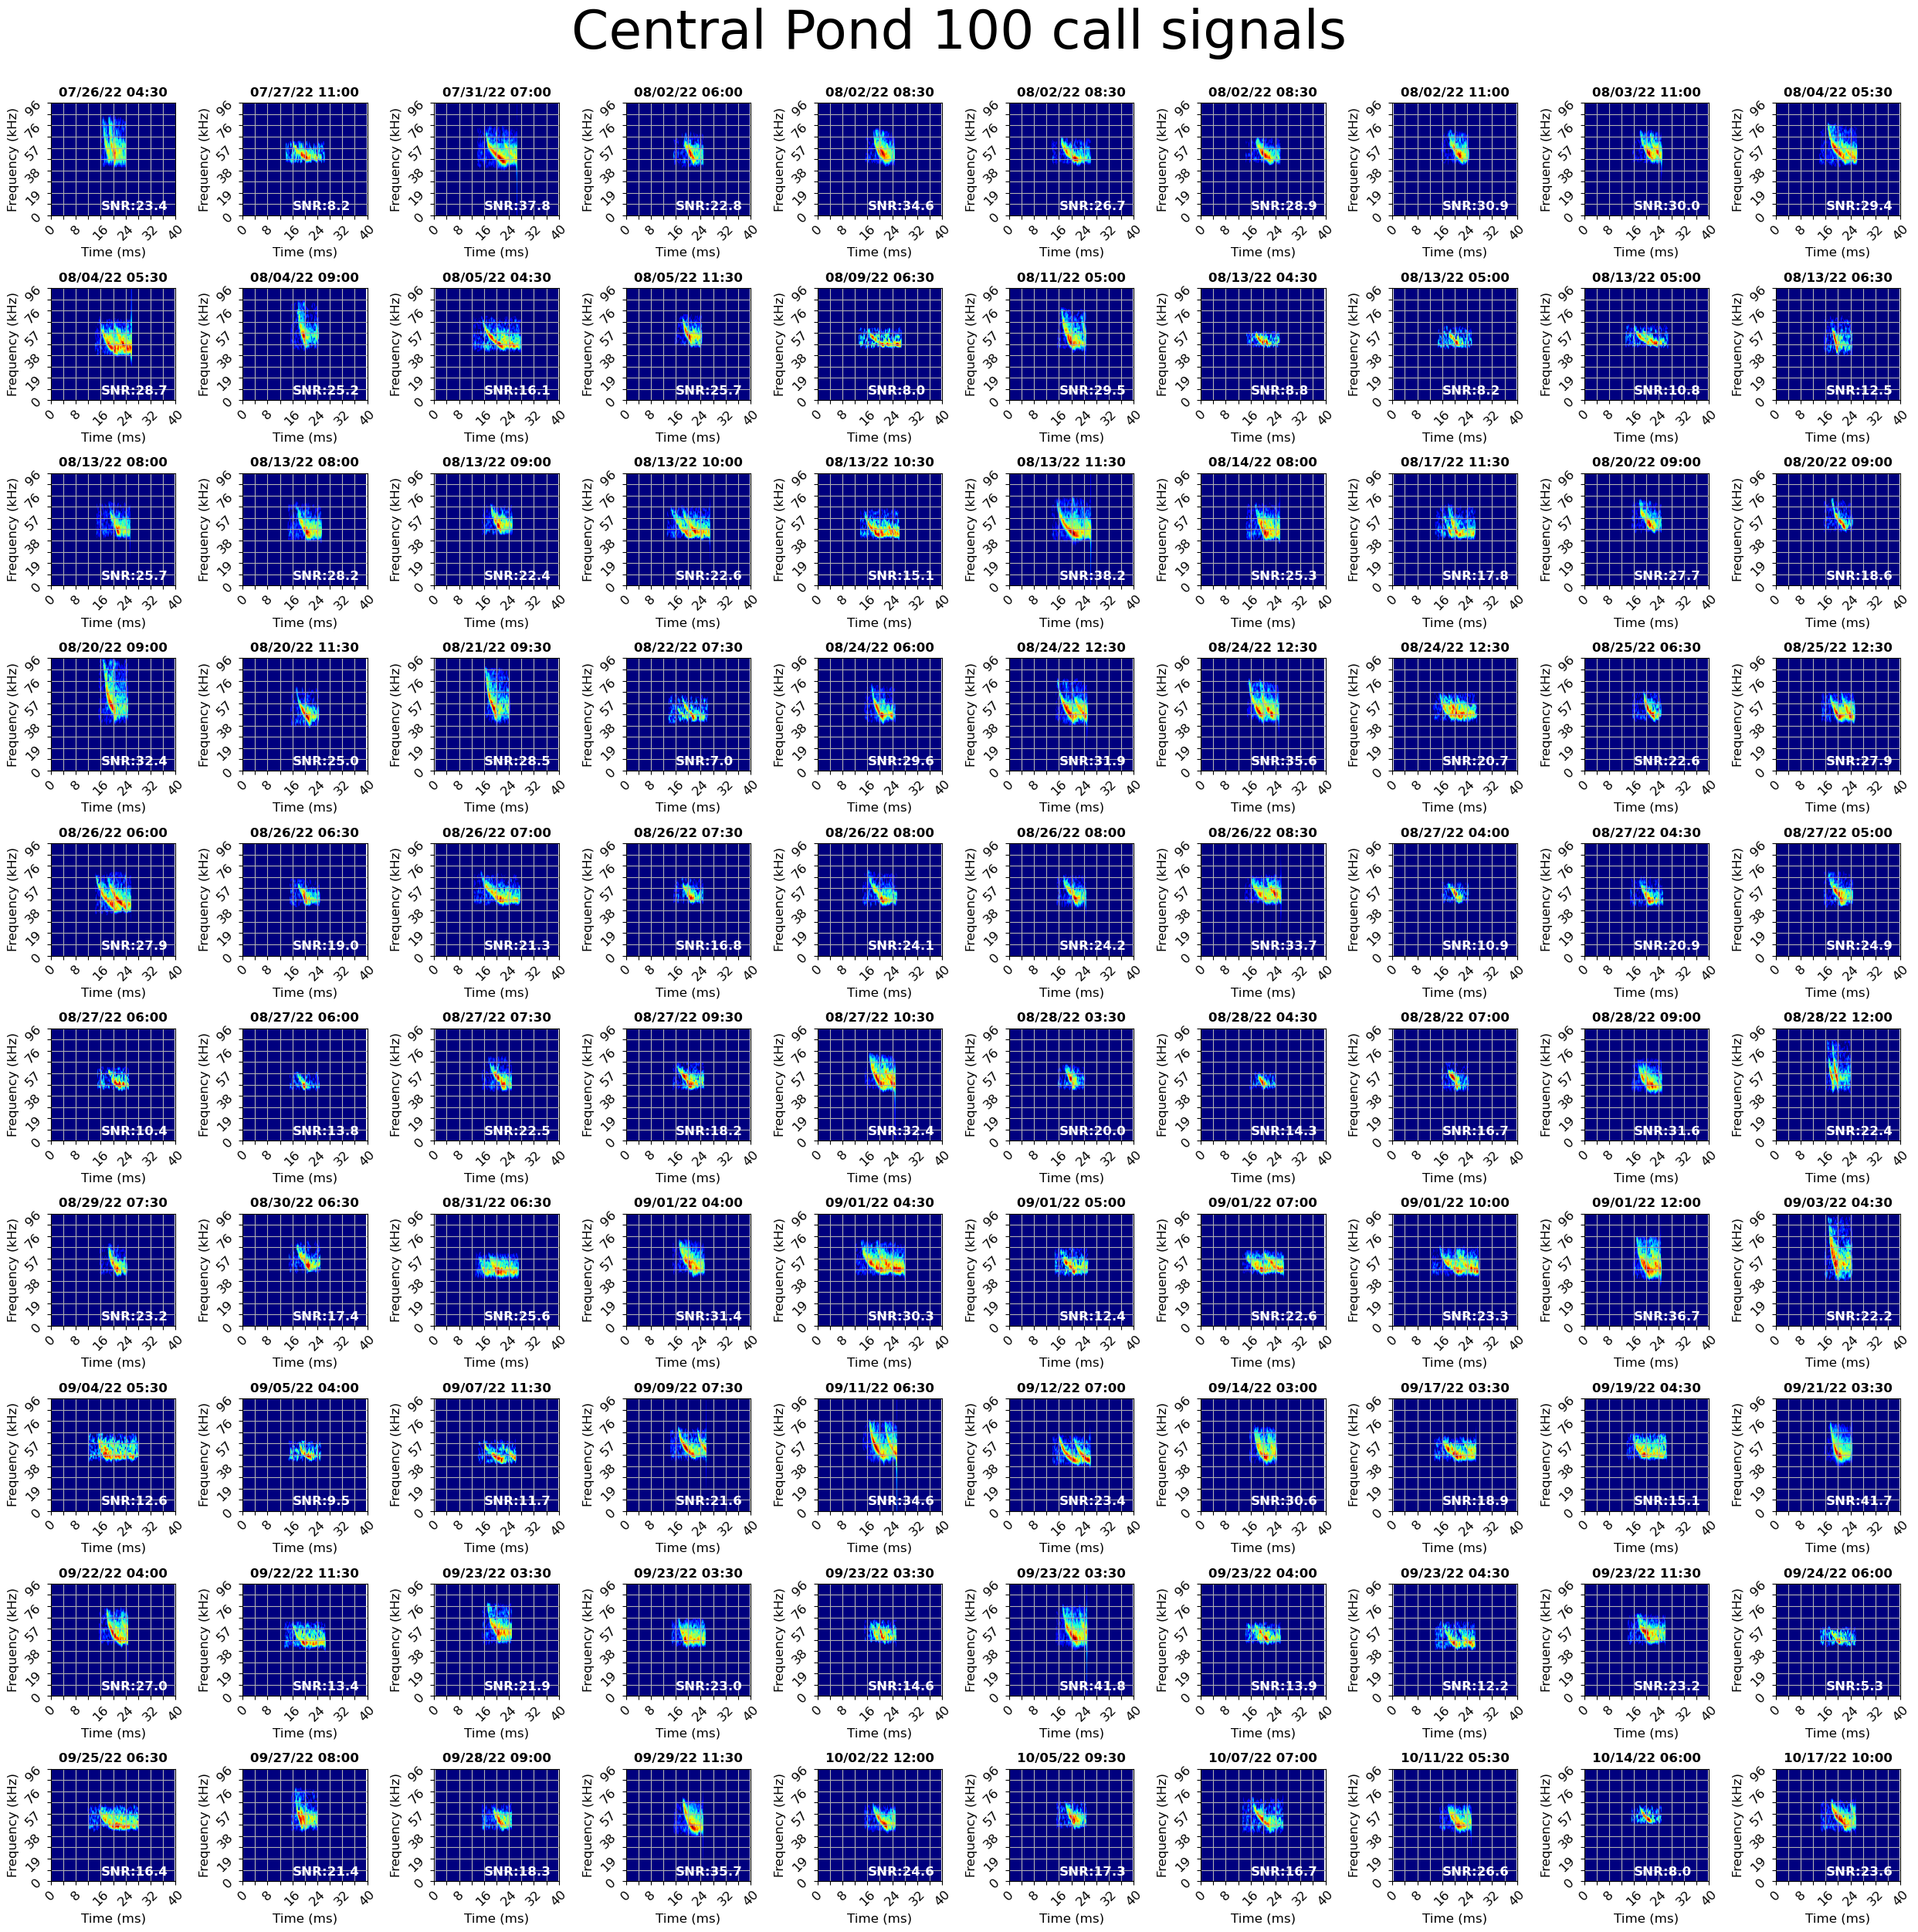

In [7]:
k = 3
kmean_welch = KMeans(n_clusters=k, n_init=10).fit(welch_signals)
plt.figure(figsize=(8, 4))
plt.title(f'Clustering Groups')
for i in range(k):
    plt.plot(kmean_welch.cluster_centers_[i], label=f'Group {i+1}')
plt.grid(which='both')
plt.legend()
plt.show()

for i in range(k):
    group_calls_sampled = location_calls_sampled[kmean_welch.labels_==i].reset_index().drop(['level_0'], axis=1)
    plot_call_features.plot_hundred_calls(group_calls_sampled, location_call_signals, site_key)

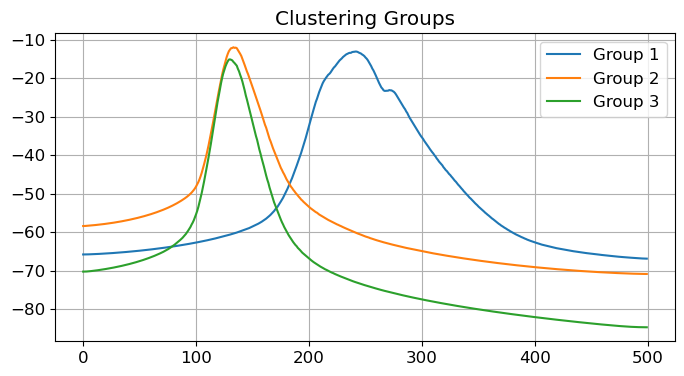

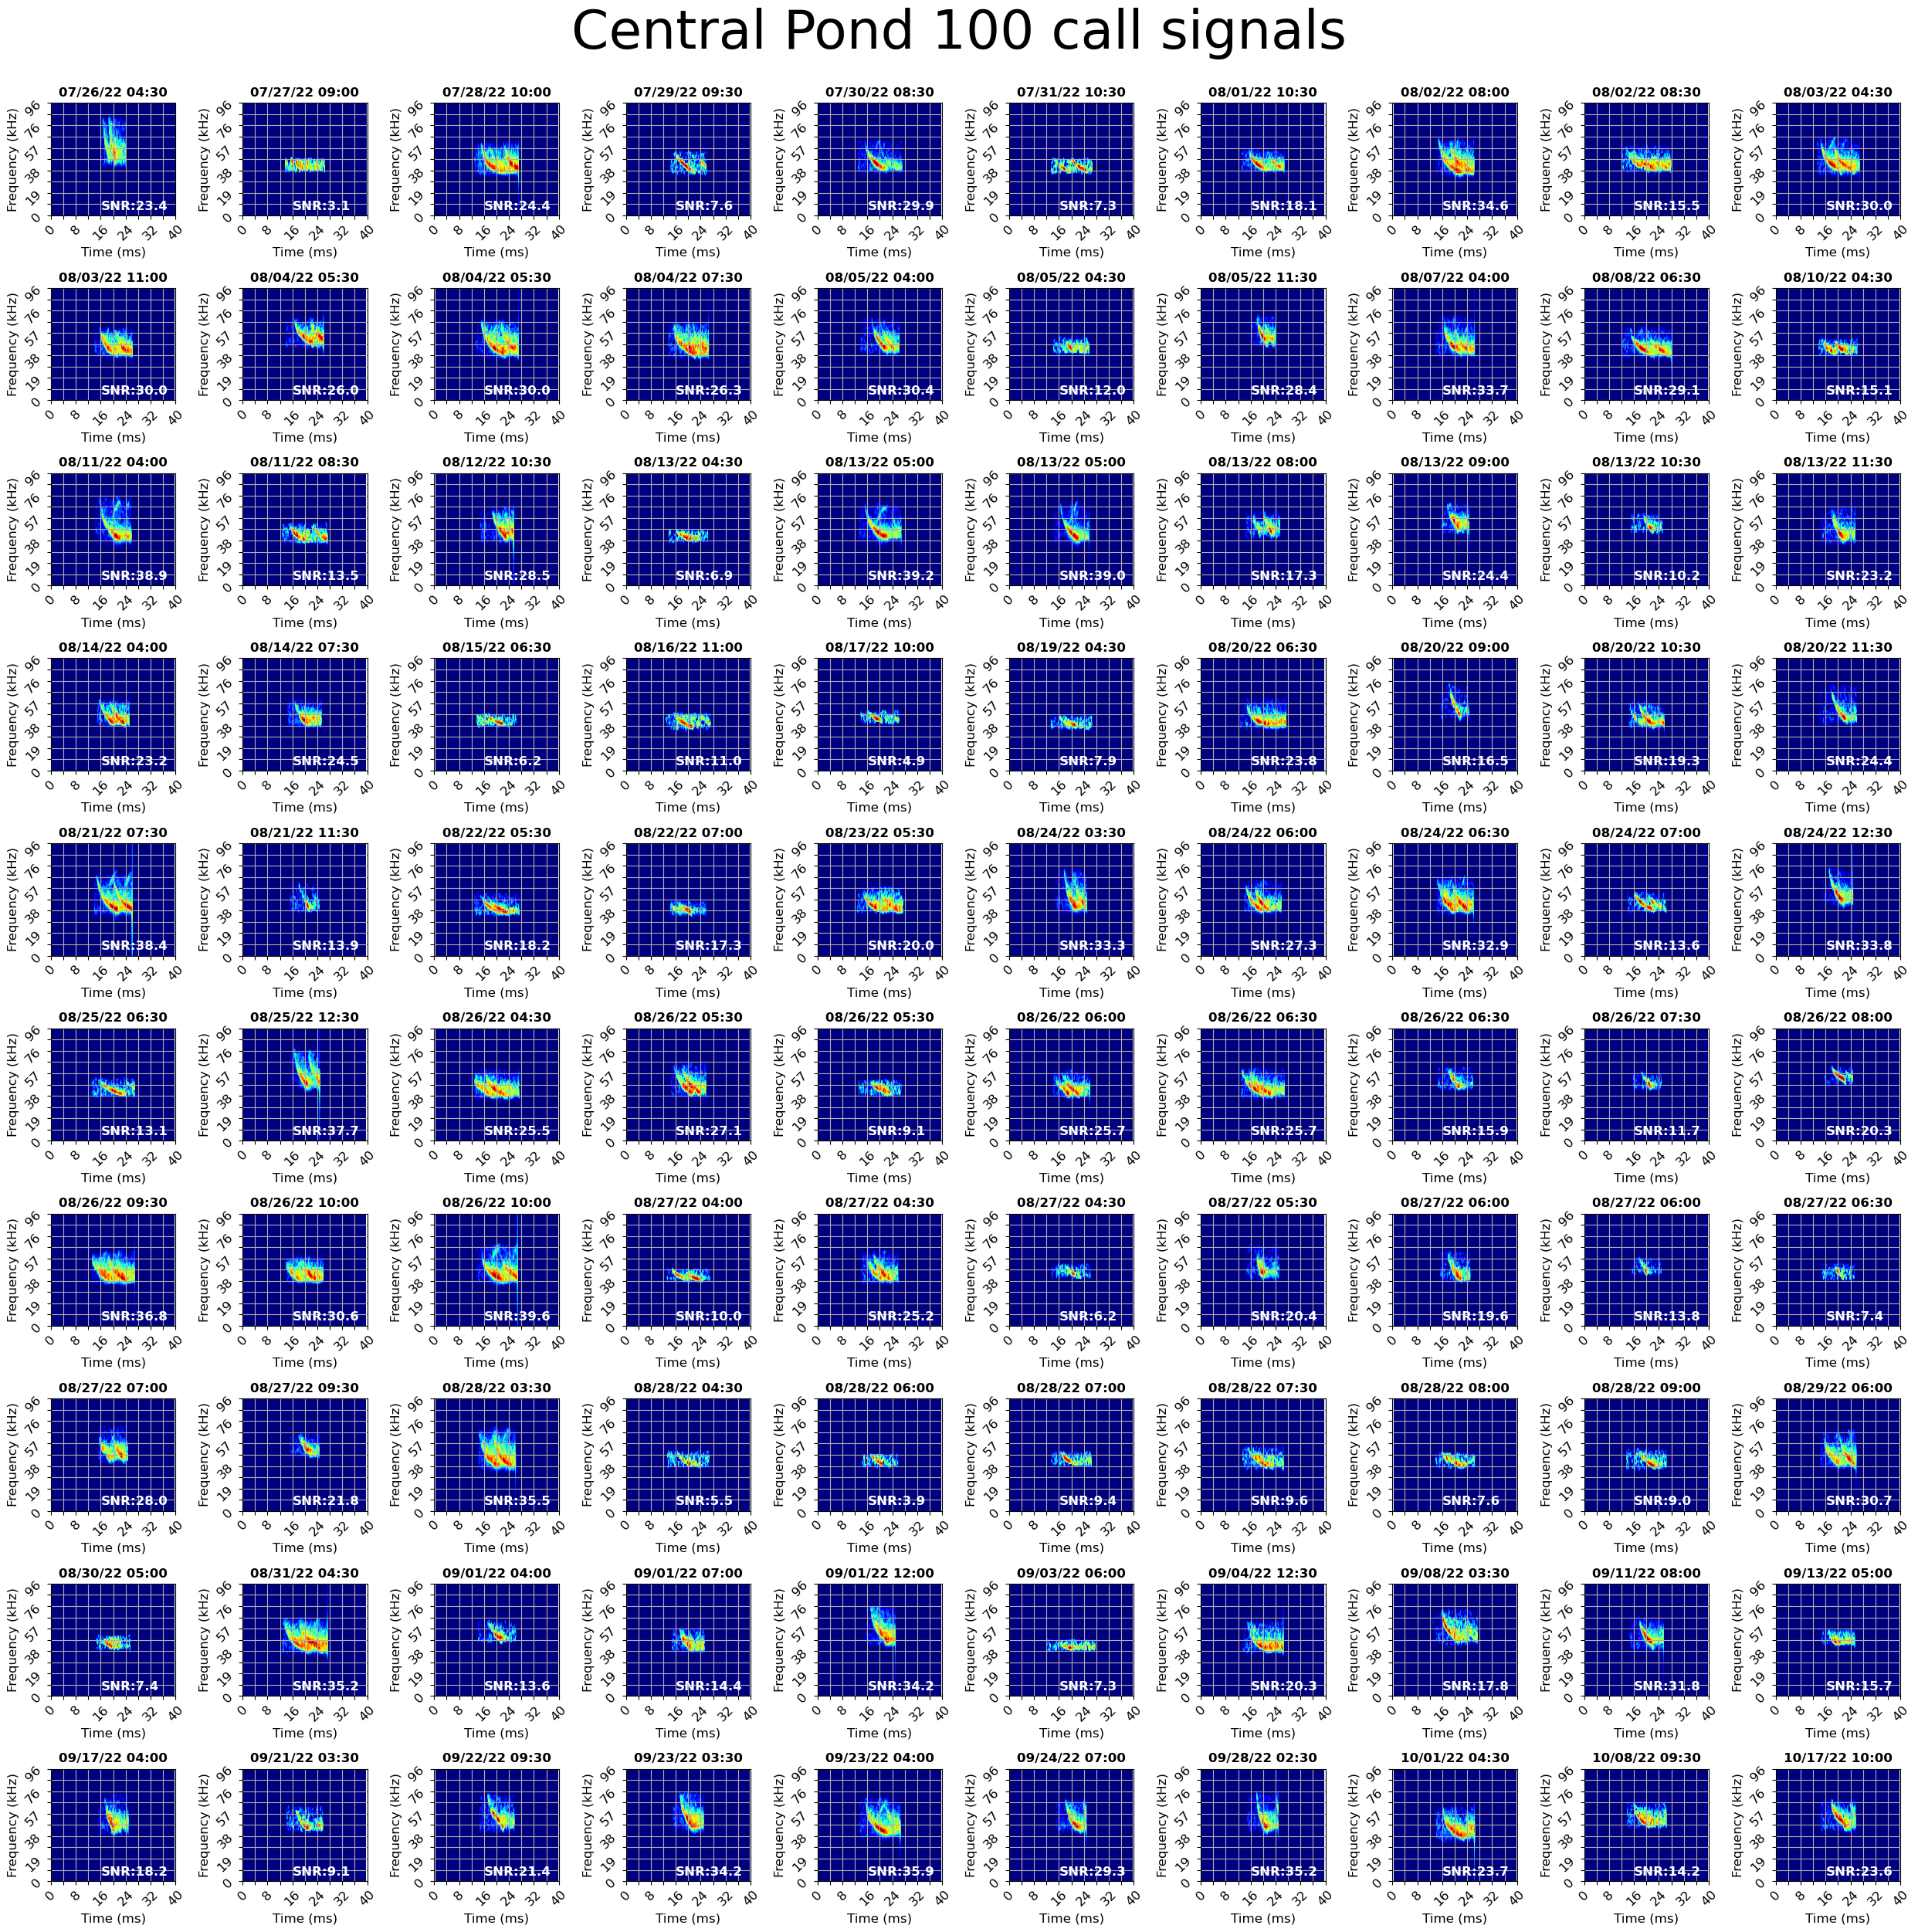

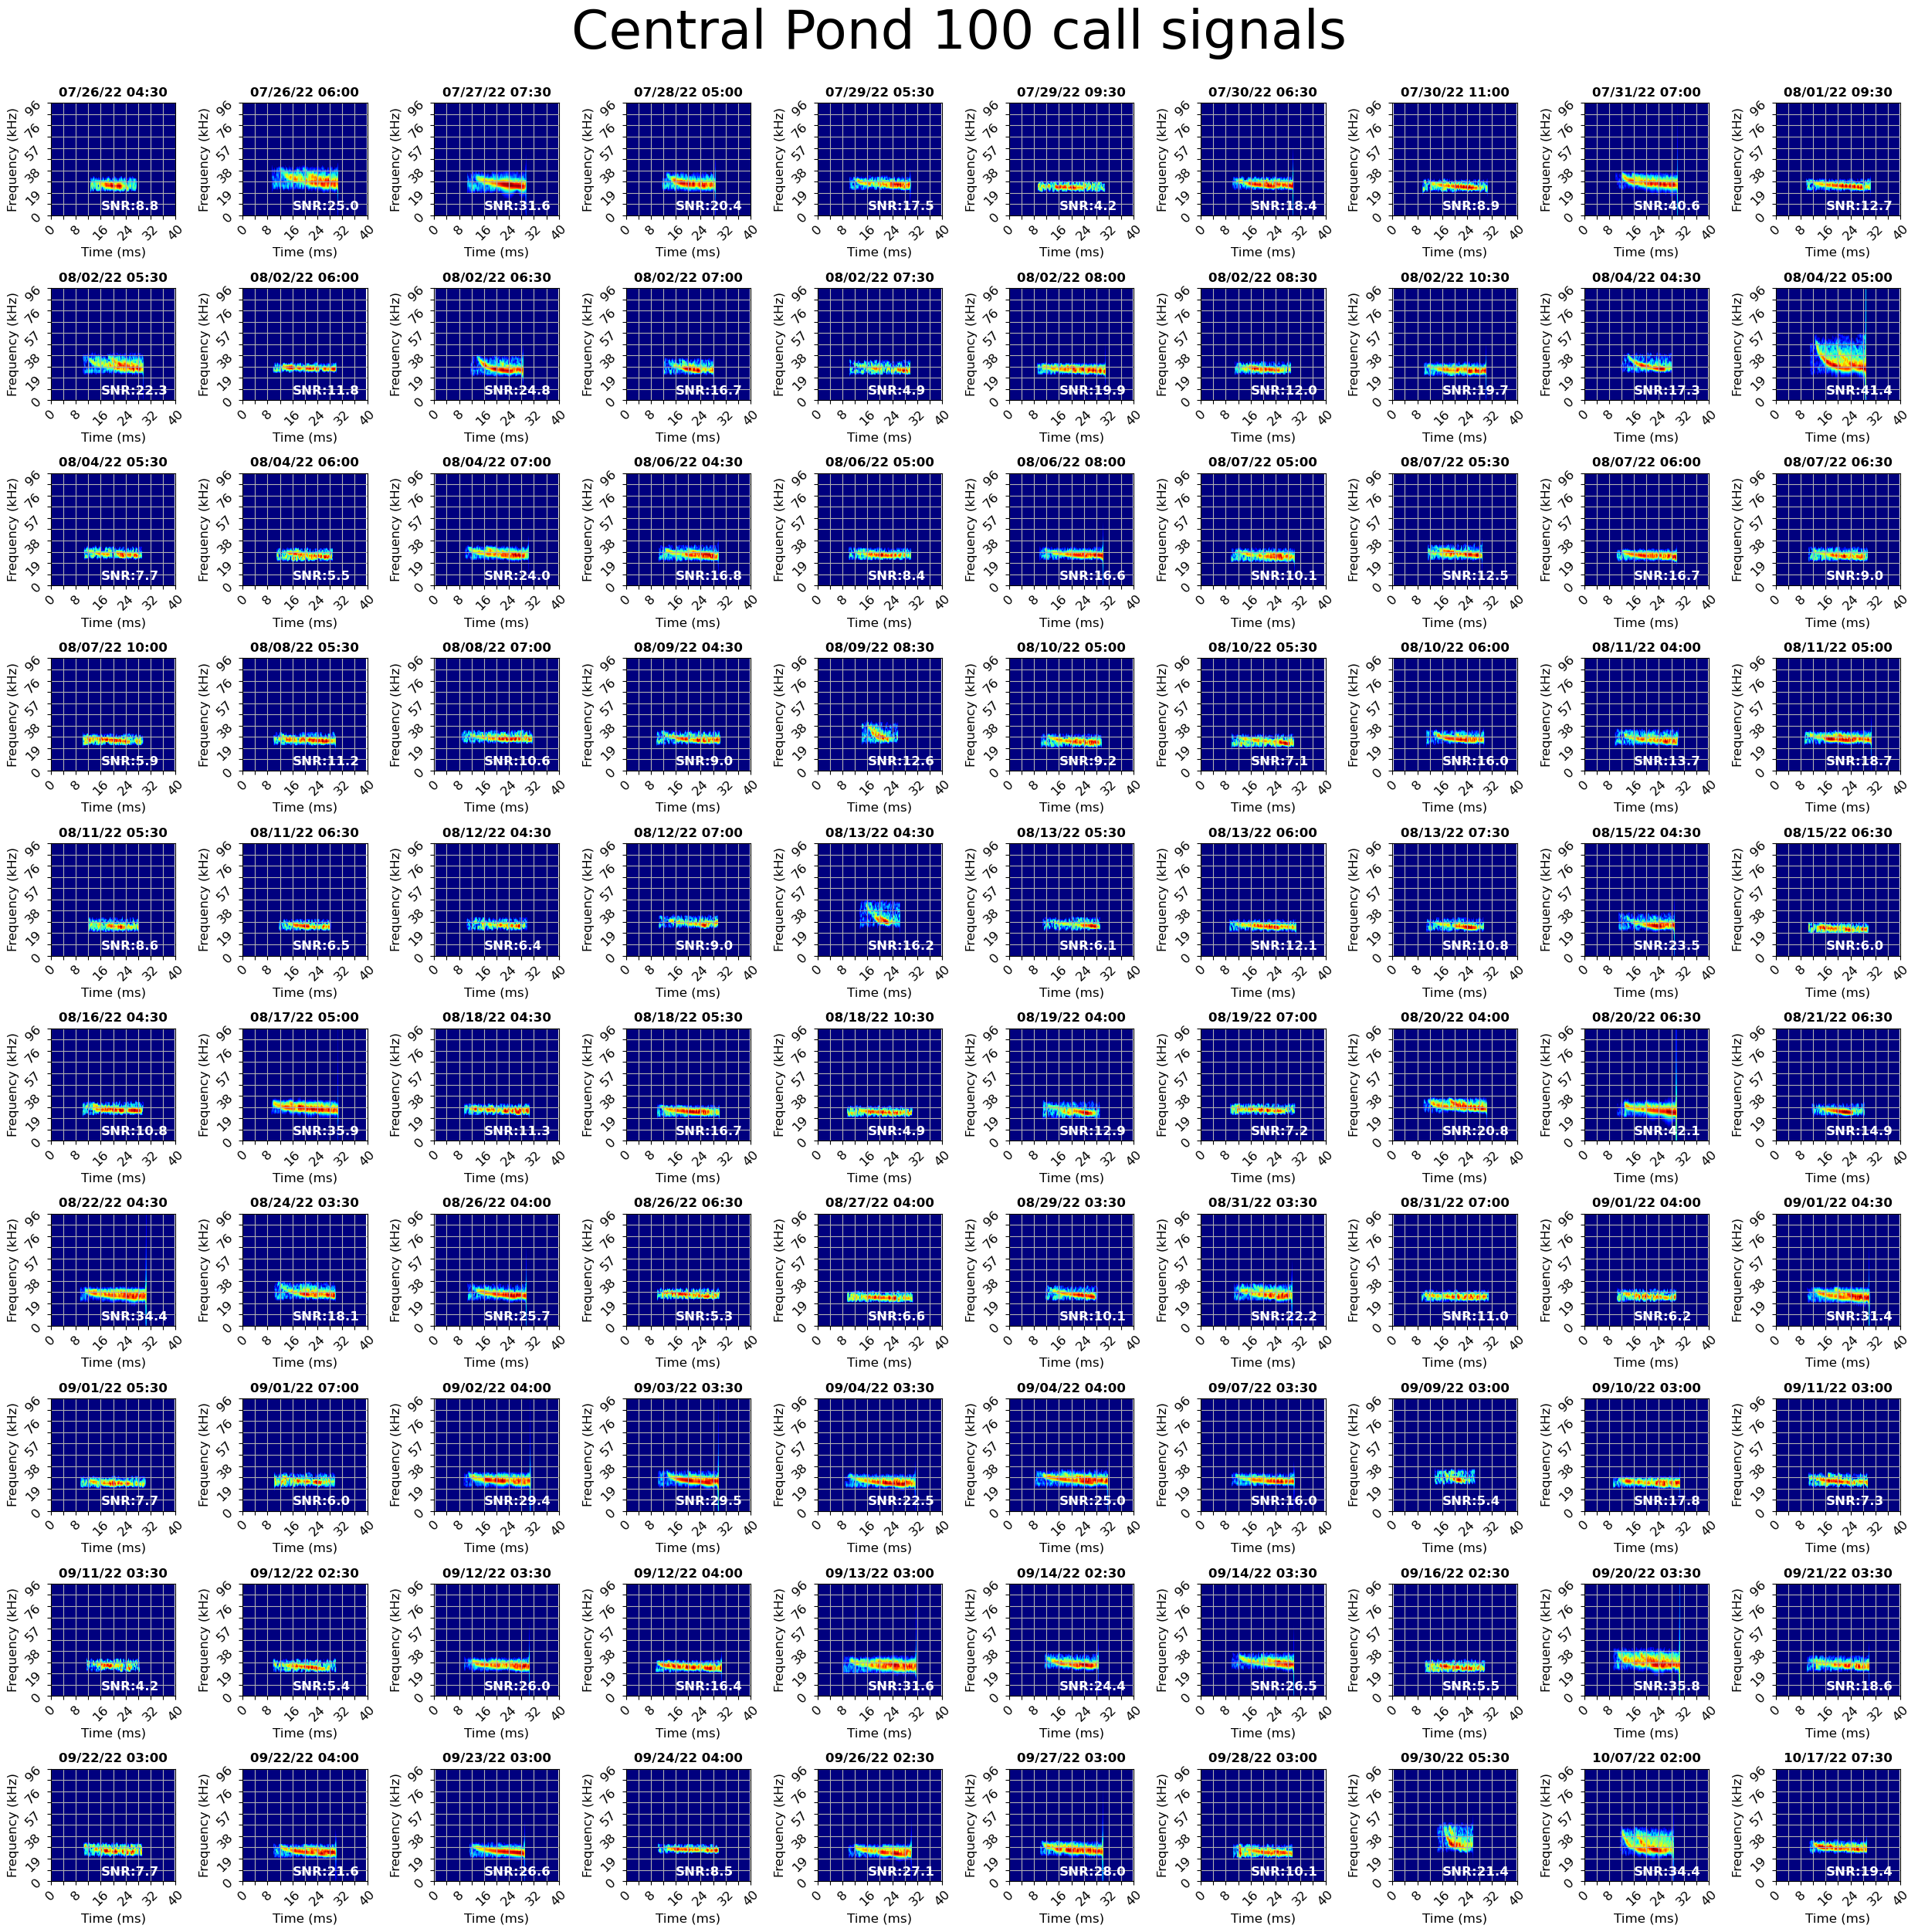

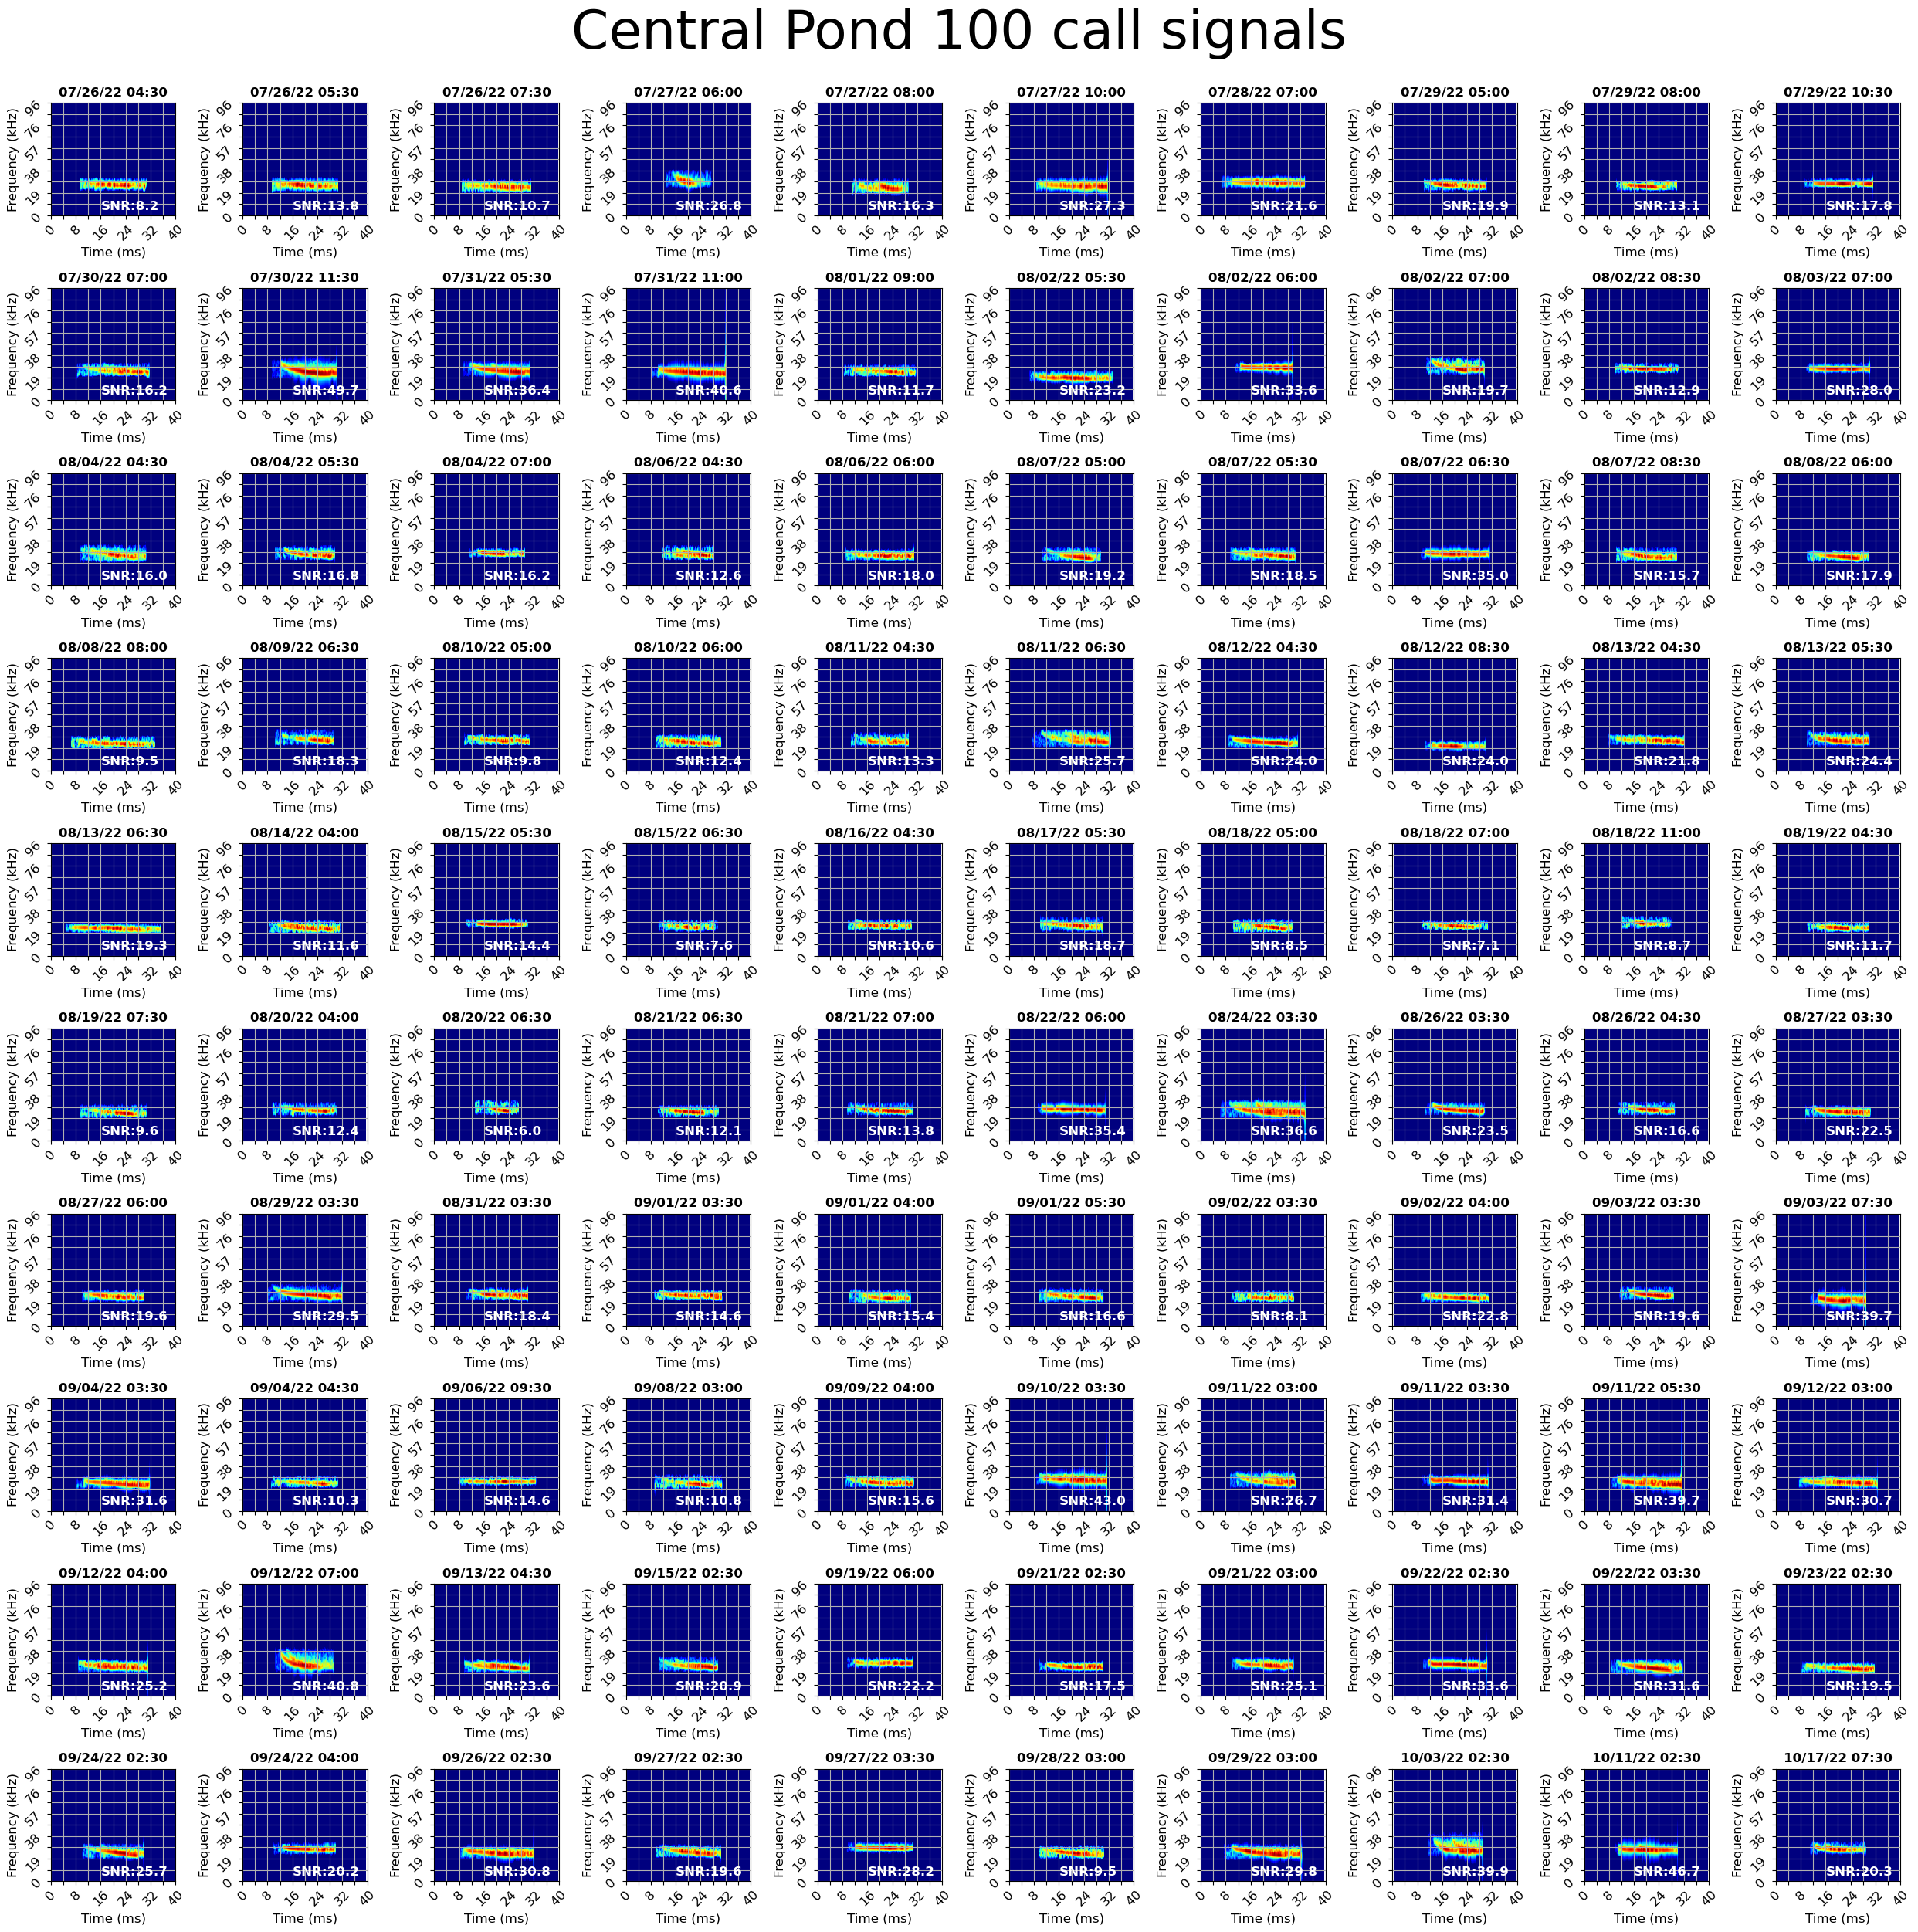

In [8]:
k = 3
kmean_fft = KMeans(n_clusters=k, n_init=10).fit(fft_signals)
plt.figure(figsize=(8, 4))
plt.title(f'Clustering Groups')
for i in range(k):
    plt.plot(kmean_fft.cluster_centers_[i], label=f'Group {i+1}')
plt.grid(which='both')
plt.legend()
plt.show()

for i in range(k):
    group_calls_sampled = location_calls_sampled[kmean_fft.labels_==i].reset_index().drop(['level_0'], axis=1)
    plot_call_features.plot_hundred_calls(group_calls_sampled, location_call_signals, site_key)